<h1 align="center">Volume 4: Spectral 1.</h1>

    Jane Slagle
    Section 1 and done!
    1/18/23

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Setup

In [2]:
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u' on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

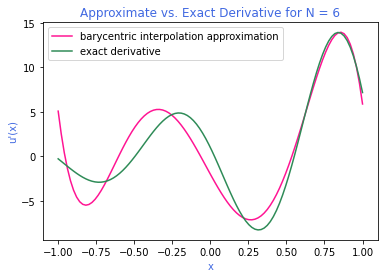

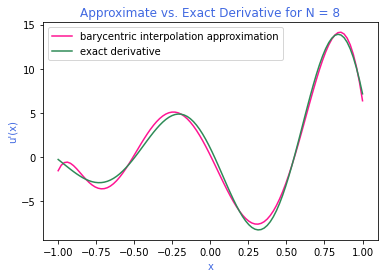

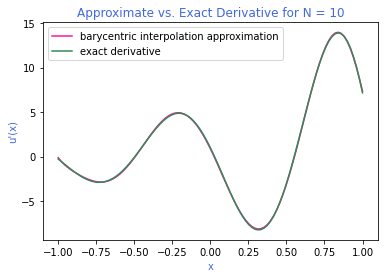

In [3]:
#define u(x) function:
u = lambda x: np.exp(x)*np.cos(6*x)

#use differentiation matrix from cheb(N) above for N = 6,8,10:
D_6, x_6 = cheb(6)     #get chebyshev pts from cheb func too
D_8, x_8 = cheb(8)
D_10, x_10 = cheb(10)

#get the U's: have U_i = u(x_i) so plug cheb pts x just got into u func
U_6 = u(x_6)
U_8 = u(x_8)
U_10 = u(x_10)

#get derivatives of U:
du_6 = D_6@U_6
du_8 = D_8@U_8
du_10 = D_10@U_10

#use barycentric interpolation to approx. u0: use the differentiation matrix deriv approx to find this
#do for each N= 6,8,10
X = np.linspace(-1, 1, 100)                        #want over grid of evenly 100 spaced pts
bary_du_6 = barycentric_interpolate(x_6, du_6, X)  #use the differentiation matrix here
bary_du_8 = barycentric_interpolate(x_8, du_8, X)
bary_du_10 = barycentric_interpolate(x_10, du_10, X)

#graphically compare your approx. (the barycentric one) to exact derivative:
exact_deriv = lambda x: np.exp(x)*np.cos(6*x) - 6*np.exp(x)*np.sin(6*x)

#will have 3 graphs: one for each N, each graph will have 2 things plotted on it
plt.title("Approximate vs. Exact Derivative for N = 6", color = "royalblue")
plt.plot(X, bary_du_6, label = "barycentric interpolation approximation", color = "deeppink")
plt.plot(X, exact_deriv(X), label = "exact derivative", color = "seagreen")
plt.xlabel("x", color = "royalblue")
plt.ylabel("u'(x)", color = "royalblue")
plt.legend(loc = "best")
plt.show()

plt.title("Approximate vs. Exact Derivative for N = 8", color = "royalblue")
plt.plot(X, bary_du_8, label = "barycentric interpolation approximation", color = "deeppink")
plt.plot(X, exact_deriv(X), label = "exact derivative", color = "seagreen")
plt.xlabel("x", color = "royalblue")
plt.ylabel("u'(x)", color = "royalblue")
plt.legend(loc = "best")
plt.show()

plt.title("Approximate vs. Exact Derivative for N = 10", color = "royalblue")
plt.plot(X, bary_du_10, label = "barycentric interpolation approximation", color = "deeppink")
plt.plot(X, exact_deriv(X), label = "exact derivative", color = "seagreen")
plt.xlabel("x", color = "royalblue")
plt.ylabel("u'(x)", color = "royalblue")
plt.legend(loc = "best")
plt.show()

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

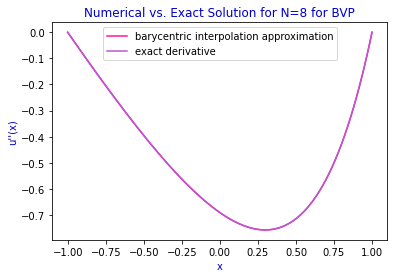

In [4]:
#define f func: u''=f(x)
f = lambda x: np.exp(2*x)

#use N=8 in cheb(N) method to approx. u:
D2, x2 = cheb(8)
D2_squared = np.dot(D2, D2)  #part of code that forces U[0] = U[N] = 0
D2_squared[0,:], D2_squared[-1,:] = 0, 0
D2_squared[0,0], D2_squared[-1,-1] = 1, 1

#get deriv. approx from this: F = [f(x_0),...f(x_N)]
F = f(x2)
F[0], F[-1] = 0, 0           #part of code that forces U[0] = U[N] = 0

#now get U'' by solving the linear system D^2U=F for U:
U = la.solve(D2_squared, F)

#now get barycentric interpolation on 100 evenly spaced points:
X_ = np.linspace(-1, 1, 100)                        
bary_dU = barycentric_interpolate(x2, U, X_)  

#compare your numerical sol w/ exact sol:
exact_sol = lambda x: (1/4)*(-np.cosh(2) - np.sinh(2)*x + np.exp(2*x))

#graphically compare numerical solution w/ exact solution:
plt.title("Numerical vs. Exact Solution for N=8 for BVP", color = "mediumblue")
plt.plot(X_, bary_dU, label = "barycentric interpolation approximation", color = "deeppink")
plt.plot(X_, exact_sol(X_), label = "exact derivative", color = "mediumorchid")

plt.xlabel("x", color = "mediumblue")
plt.ylabel("u''(x)", color = "mediumblue")
plt.legend(loc = "best")
plt.show()

# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

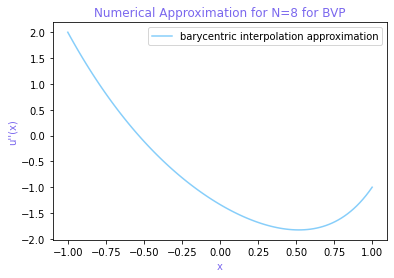

In [10]:
#define what our problem is equal to:
f3 = lambda x: np.exp(3*x)

#use N=8 in cheb(N) method to approx deriv:
D3, x3 = cheb(8)
D3_squared = np.dot(D3, D3) #need both D,D^2 here since have u'+u''

#set the boundary points so they don't get messed up:
L = D3 + D3_squared
L[0,:], L[-1,:] = 0, 0
L[0,0], L[-1,-1] = 1, 1

F3 = f3(x3)            #get deriv. approx from this: F = [f(x_0),...f(x_N)]
F3[0], F3[-1] = -1, 2  #have u(-1)=2, u(1)=-1 here, not 0, 0 anymore

#now get U'' by solving linear system for U:
U3 = la.solve(L, F3)

#now get barycentric interpolation on 100 evenly spaced points:
X3 = np.linspace(-1, 1, 100)                   
bary3_dU = barycentric_interpolate(x3, U3, X3)  

#plot the approx. now:
plt.title("Numerical Approximation for N=8 for BVP", color = "mediumslateblue")
plt.plot(X3, bary3_dU, label = "barycentric interpolation approximation", color = "lightskyblue")

plt.xlabel("x", color = "mediumslateblue")
plt.ylabel("u''(x)", color = "mediumslateblue")
plt.legend(loc = "best")
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

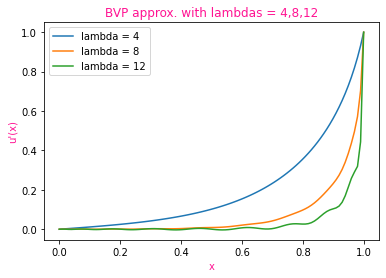

In [11]:
#use N=20 in cheb(N) method:
N = 20
x_vals = np.linspace(0, 1, 100)

#loop through all of the lambda values
for lam in [4,8,12]:
    D, x = cheb(N) 
    x = (1/2)*(x+1)   #we are on [-1,1] but want [0,1] so doing x+1 shifts to 0-2, dividing by 1/2 shifts to 0-1
    D2 = np.dot(D, D) #need for F func below bc u'' = D^2*U

    #this is exact same thing as other probsm except we make F in this func below since F is dependent on u here
    #sample code given in lab manual to do Newton's method:
    def F(U):
        #set boundary conditions, Max figured these out:
        return_val = 4 *D2 @ U - lam*np.sinh(lam*U)  #multiply by 4 bc of taking 2nd deriv, Max figured out
        return_val[-1] = U[0] - 1
        return_val[0] = U[-1]
        
        return return_val   #Newtons Method will update U until the output is all 0's.

    guess = np.ones(len(x)) #Make guess, same size as cheb(N) output, Bryce said to make guess of all 1s
    solution = root(F, guess).x  #then get solution, sol is value of col of U's that make eq = 0 (Newtons eq)
    
    #now use barycentric interpolation to approx. u on x_vals linspace:
    u_approx = barycentric_interpolate(x, solution, x_vals) 
    
    #now plot each u approx. for each lambda value, plot each lam on :
    plt.plot(x_vals, u_approx, label = "lambda = " + str(lam))

plt.title("BVP approx. with lambdas = 4,8,12", color = "deeppink")
plt.xlabel("x", color = "deeppink")
plt.ylabel("u'(x)", color = "deeppink")
plt.legend(loc = "best")
plt.show()  

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

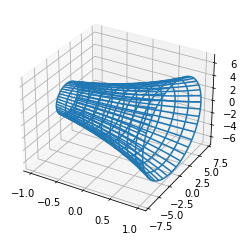

In [12]:
#use N=50 in cheb(N) method:
N = 50
x_vals = np.linspace(0, 1, 100)

D, x = cheb(N) 
D2 = np.dot(D, D) #need for F func below bc u'' = D^2*U

#this is exact same thing as other probsm except we make F in this func below since F is dependent on u here
#sample code given in lab manual to do Newton's method:
def F(U):
    #want to change lines 15,16,17 from prob 4: use equation from lab manual that comes right before the prob box
    #that equation in lab manual: Y is same thing as U here
    return_val = U*(D2@U) - (D@U)*(D@U) - np.ones(len(U))  #I is np.ones(len(U)) here, want subtract it off bc want all to equal 0
    return_val[-1] = U[0]-7   #get the boundary conditions, have y(-1) = 1 so need subtract off 7
    return_val[0] = U[-1]-1   #other boundary condt is y(1) = 7, need subtract off 1
        
    return return_val

guess = 2*np.ones(len(x))    #want initial guess of all 2's
solution = root(F, guess).x  #then get solution, sol is value of col of U's that make eq = 0 (Newtons eq)
    
#barycentric is exactly what u_approx from #4 is
barycentric = barycentric_interpolate(x, solution, x_vals) #now use barycentric interpolation to approx. u on x_vals linspace
    
lin = np.linspace(-1, 1, 100)
theta = np.linspace(0,2*np.pi,401)
X, T = np.meshgrid(lin, theta)
Y, Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = plt.axes(projection="3d")  #change this line to be plt.axes instead
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()